<h1 align="center"> 學第一個基本功能的TensorFlow程式就上手 </h1>

---


Author: Eugene Su 

Email: <su.eugene@gmail.com>

https://sites.google.com/view/smartrobot/lab


---



### 導入程式會使用到的模組(moduel)或套件(package)
<em> import放在最開頭是個慣例 </em>

In [1]:
# 在Google Colab安裝seaborn
!pip install --upgrade seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow import keras  # tensorflow.keras or tf.keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [3]:
# IPython Magic Functions 內嵌圖表
%matplotlib inline  

### 載入MNIST資料集
<a href="https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data"> <em> tf.keras.datasets.mnist.load_data </em> </a>

In [4]:
(X_train, y_train) , (X_val, y_val) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# 訓練集X_train矩陣維度
X_train.shape

(60000, 28, 28)

In [6]:
# 訓練集y_train矩陣維度
y_train.shape

(60000,)

In [7]:
# 驗證集X_val矩陣維度
X_val.shape

(10000, 28, 28)

In [8]:
# 驗證集y_val矩陣維度
y_val.shape

(10000,)

In [9]:
# 圖片資料型別是uint8?還是float?
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

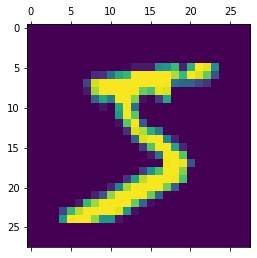

In [10]:
# 可視化第一筆資料
plt.matshow(X_train[0])

In [11]:
# 第一筆資料的類別或標註
y_train[0]

5

### 前處理
data augmentation, standardization, normalization, reshape

In [12]:
# 選擇何種standardization和normalization的演算法，與神經網路的activation function和資料集資料的型態有關
# 因為我們的資料的型態是uint8的圖片，且神經網路的activation function是sigmoid，所以選擇min-max normalization

X_train_norm = X_train / 255
X_val_norm = X_val / 255

In [13]:
# 執行min-max normalization之後，資料數值會介於0與1之間
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# reshape (60000, 28, 28) to (60000, 784) and (10000, 28, 28) to (10000, 784)

X_train_flattened = X_train_norm.reshape((len(X_train), 784))
X_val_flattened = X_val_norm.reshape((len(X_val), 784))

### 建構神經網路
包含網路結構、優化器、損失函數、度量指標

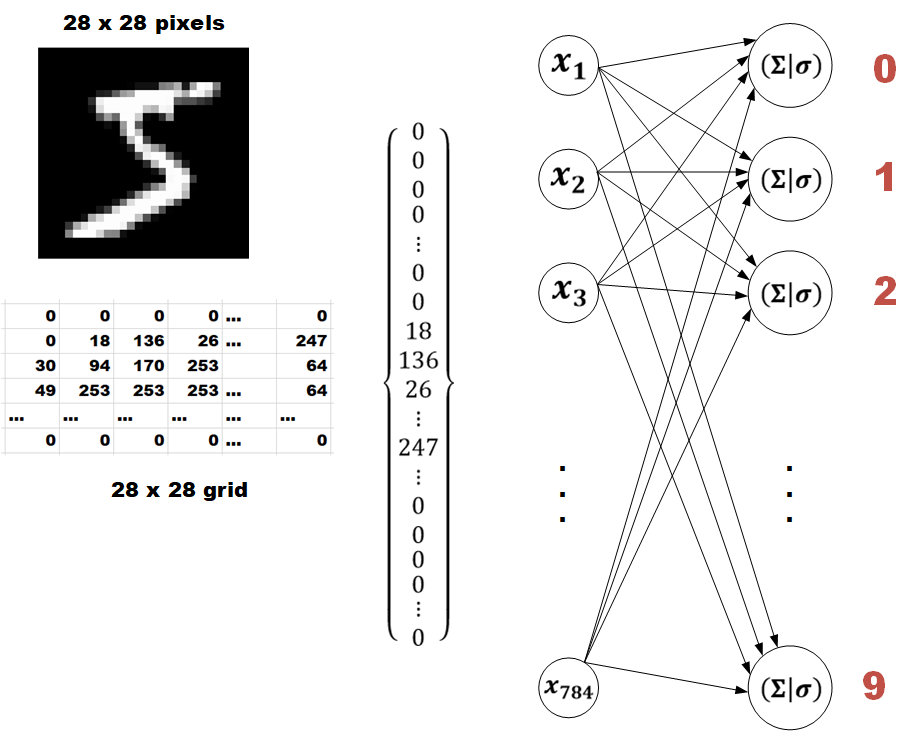

In [15]:
# 單層全連接網路結構
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [16]:
# 優化器、損失函數、度量指標
# 優化器包含learning rate，在此使用預設值
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 使用TensorFlow內建的training loop進行模型訓練

In [17]:
# 開始訓練5個epochs
# 此處的accuracy是訓練集的accuracy
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4682 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3030 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9261


### 驗證和分析訓練結果

In [18]:
# 使用未參與訓練的驗證集驗證模型泛化性
# 此處的accuracy是驗證集的accuracy
model.evaluate(X_val_flattened, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9258


[0.26811859011650085, 0.9258000254631042]

In [19]:
# 推論(Inference)或預測(Prediction)1張圖片
predict_one = model.predict(X_val_flattened[:1])

In [20]:
# 預測的結果是什麼? 為什麼是10個float32數值?
predict_one

array([[2.9199988e-02, 5.2710311e-07, 4.7497809e-02, 9.4945836e-01,
        2.2548437e-03, 1.1348656e-01, 1.1924818e-06, 9.9979836e-01,
        1.3891220e-01, 6.6059780e-01]], dtype=float32)

In [21]:
# numpy.argmax: Returns the indices of the maximum values along an axis.
np.argmax(predict_one)

7

### 混淆矩陣
評估模型必要的度量指標

In [22]:
# 預測全部驗證集
valset_predicted = model.predict(X_val_flattened)

# 預測的結果轉換成預測的類別
valset_predicted_classes = [np.argmax(i) for i in valset_predicted]

In [23]:
# 產生混淆矩陣
confusion_matrix = tf.math.confusion_matrix(labels=y_val, predictions=valset_predicted_classes)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    6,    7,    4,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,    9,  920,   17,    9,    5,   12,   12,   39,    2],
       [   4,    0,   17,  899,    0,   39,    2,   12,   28,    9],
       [   1,    1,    3,    2,  918,    0,   11,    4,    7,   35],
       [   9,    3,    2,   23,   12,  783,   17,    6,   29,    8],
       [   9,    3,    6,    1,    8,   11,  915,    2,    3,    0],
       [   1,    8,   23,    5,    4,    0,    0,  956,    1,   30],
       [   5,    9,    5,   14,    9,   23,    9,   12,  881,    7],
       [   8,    7,    2,    8,   29,    7,    0,   26,   12,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'True Class')

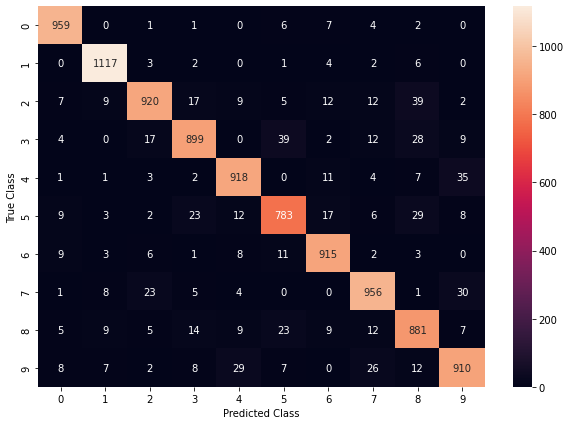

In [24]:
# 可視化混淆矩陣
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

<h3 style="color:red" align="center">重置、重新再訓練一次，比較兩次混淆矩陣的差異</h3>